ANTHONY MANYURA<BR>
DVT-03 <BR>
2ND PHASE PROJECT<BR>

# INTRODUCTION



#Introduction
<br>**Understanding Crop Yield in Karamoja**<br>

---



This project aims to analyze crop yield data for sorghum and maize in Karamoja, Uganda, a region known for its food insecurity. By utilizing satellite imagery and geographic information systems (GIS), we will gain valuable insights into crop performance and identify areas that may require targeted interventions to improve food security.<br>

### The primary objectives of this analysis include:<br>

-Assessing the spatial variability of crop yields across different administrative levels (districts and sub-counties).<br>
-Identifying areas with low crop productivity and potential factors contributing to these low yields.<br>
-Providing data-driven recommendations to support decision-making for NGOs working in the region.<br>
<br>
This analysis will leverage a dataset containing crop yield, population, and area information for sorghum and maize in Karamoja. We will employ Python programming and GIS tools to visualize and interpret the data, ultimately contributing to a better understanding of food security challenges and opportunities in this region.

# 1. Loading Data

We will now proceed to load the necessary data files using the Pandas library. Pandas provides a powerful and flexible interface for working with tabular data in Python.<br>

Once the data is loaded, we will perform some initial exploratory analysis to understand the structure, content, and quality of the data. This will involve tasks such as:<br>

-Checking for missing values and handling them appropriately.<br>
-Examining data types and ensuring they are consistent with our analysis needs.<br>
-Calculating summary statistics to get a sense of the data distribution.<br>
-Identifying any potential outliers or anomalies that may require further investigation.<br>

In [2]:
#loading the data
import pandas as pd

# import the relevant csv files
District_Crop_Yield = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')
Subcounty_Crop_Yield = pd.read_csv('Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')


In [3]:
#show the first five columns of District crop yield
District_Crop_Yield.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [4]:
#show the first five rentries of Subcounty crop yield
Subcounty_Crop_Yield.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


The data has been loaded

In [19]:
# We check the number of Districts we have in the data
#count number of unique entries for "NAME" in District_Crop_Yield
District_Crop_Yield['NAME'].nunique()


7

In [20]:
#listing them
District_Crop_Yield['NAME'].unique()

array(['ABIM', 'AMUDAT', 'KAABONG', 'KOTIDO', 'MOROTO', 'NAKAPIRIPIRIT',
       'NAPAK'], dtype=object)

In [21]:
# We check number of subcounties we have in the data
#count number of unoque entries for "SUBCOUNTY_NAME" in Subcounty_Crop_Yield
Subcounty_Crop_Yield['SUBCOUNTY_NAME'].nunique()



52

In [22]:
#listing them
Subcounty_Crop_Yield['SUBCOUNTY_NAME'].unique()

array(['KACHERI', 'KOTIDO', 'KOTIDO TOWN COUNCIL', 'NAKAPERIMORU',
       'PANYANGARA', 'RENGEN', 'KAABONG  EAST', 'KAABONG TOWN COUNCIL',
       'KAABONG WEST', 'KALAPATA', 'KAMION', 'KAPEDO', 'KATHILE',
       'KAWALAKOL', 'LOBALANGIT', 'LODIKO', 'LOLELIA', 'LOYORO',
       'NAPORE (KARENGA)', 'SIDOK', 'ABIM', 'ABIM TOWN COUNCIL', 'ALEREK',
       'LOTUKEI', 'MORULEM', 'KARITA', 'LOROO', 'AMUDAT',
       'AMUDAT TOWN COUNCIL', 'KATIKEKILE', 'NADUNGET', 'TAPAC',
       'NORTHERN DIVISION', 'SOUTHERN DIVISION', 'LOREGAE',
       'NAKAPIRIPIRIT TOWN COUNCIL', 'NAMALU', 'KAKOMONGOLE', 'LOLACHAT',
       'LORENGEDWAT', 'NABILATUK', 'IRIIRI', 'LOPEEI', 'LORENGECORA',
       'LOTOME', 'MATANY', 'NAPAK TOWN COUNCIL', 'NGOLERIET', 'NYAKWAE',
       'LOKOPO', 'RUPA', 'MORUITA'], dtype=object)

In [5]:
#identifying the columns in each file
District_Crop_Yield.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [6]:
Subcounty_Crop_Yield.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [7]:
#check for missing values in each table
District_Crop_Yield.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [8]:
Subcounty_Crop_Yield.isnull().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


From the above we see the data is okay as it has no missing values

In [9]:
#summary statistics
District_Crop_Yield.describe()


,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


In [10]:
#summary statistics
Subcounty_Crop_Yield.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


# 2.Data Analysis & Vizualization
This section will explore the crop yield data through various visualizations to uncover patterns, trends, and relationships that can inform decision-making for improving food security in Karamoja.

## 2.1 Comparing production in each distict

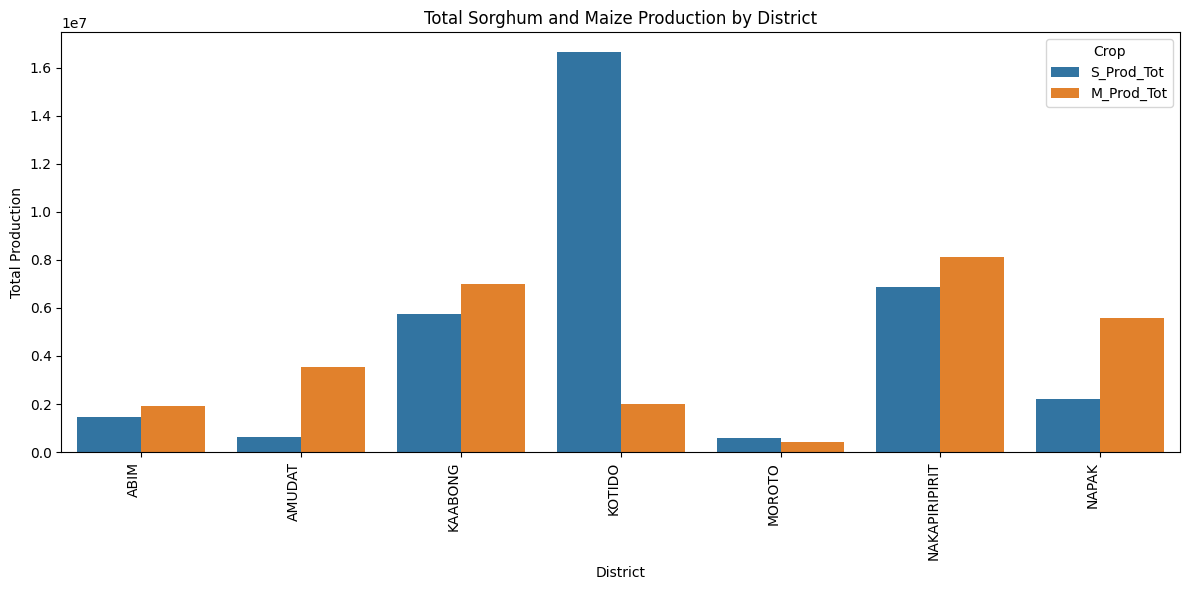

In [24]:
# In the District_Crop_Yield df,  S_Yield_Ha represents sorghum yeild in hacters and M_Yield_
# S_Prod_Tot is Sorghum production total
# we plot a bar graph  each district against total production of sorghum
import matplotlib.pyplot as plt
import seaborn as sns
#import required libraries

District_Crop_Yield_melted = pd.melt(District_Crop_Yield, id_vars=['NAME'], value_vars=['S_Prod_Tot', 'M_Prod_Tot'], var_name='Crop', value_name='Total Production')

#structure of the graph
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME', y='Total Production', hue='Crop', data=District_Crop_Yield_melted)
plt.xlabel('District')
plt.ylabel('Total Production')
plt.title('Total Sorghum and Maize Production by District')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Crop')
plt.tight_layout()
plt.show()


### Interpretation
Overall, the chart shows that Kotido district has the highest total production of both sorghum and maize, with sorghum production being significantly higher than maize production. The districts of Nakapiripirit and Kaabong also have relatively high levels of sorghum production. However, the production of both crops is relatively low in the districts of Moroto and Napak.

## 2.2 Comparing production in each Subcounty

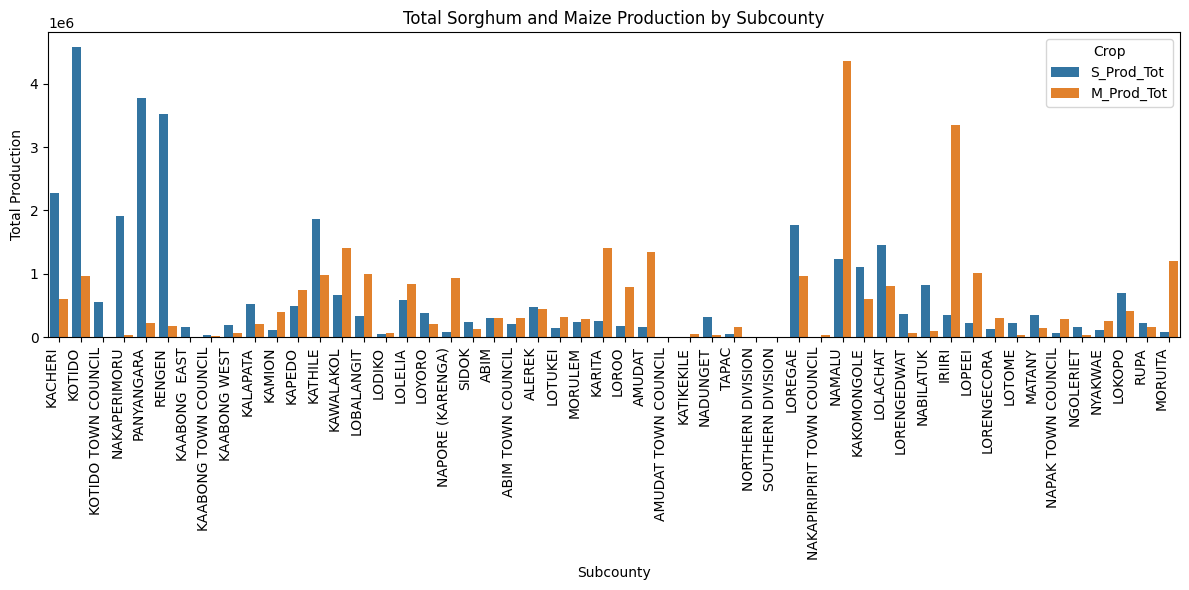

In [40]:
# In Subcounty_Crop_Yield df S_Yield_Ha represents sorghum yeild in hacters and M_Yield_ represent maize yield in hacters
# S_Prod_Tot is Sorghum production total and M_Prod_Tot is Maize production total
# we now plot a side by side bar graph for each subcounty against total production of sorghum and maize


Subcounty_Crop_Yield_melted = pd.melt(Subcounty_Crop_Yield, id_vars=['SUBCOUNTY_NAME'], value_vars=['S_Prod_Tot', 'M_Prod_Tot'], var_name='Crop', value_name='Total Production')

plt.figure(figsize=(12, 6))
sns.barplot(x='SUBCOUNTY_NAME', y='Total Production', hue='Crop', data=Subcounty_Crop_Yield_melted)
plt.xlabel('Subcounty')
plt.ylabel('Total Production')
plt.title('Total Sorghum and Maize Production by Subcounty')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Crop')
plt.tight_layout()
plt.show()

### Interpretation
Overall, the chart shows that the sub-counties within the Kotido district, particularly Kotido Town Council and Kachereri, have the highest total production of both sorghum and maize. The sub-counties of Kaabong East and Nakapiripirit also have relatively high levels of sorghum production. However, the production of both crops is relatively low in many sub-counties, especially those in the Moroto and Napak districts.

## 2.3 Relationship between population density and average crop yield for sorghum and maize.

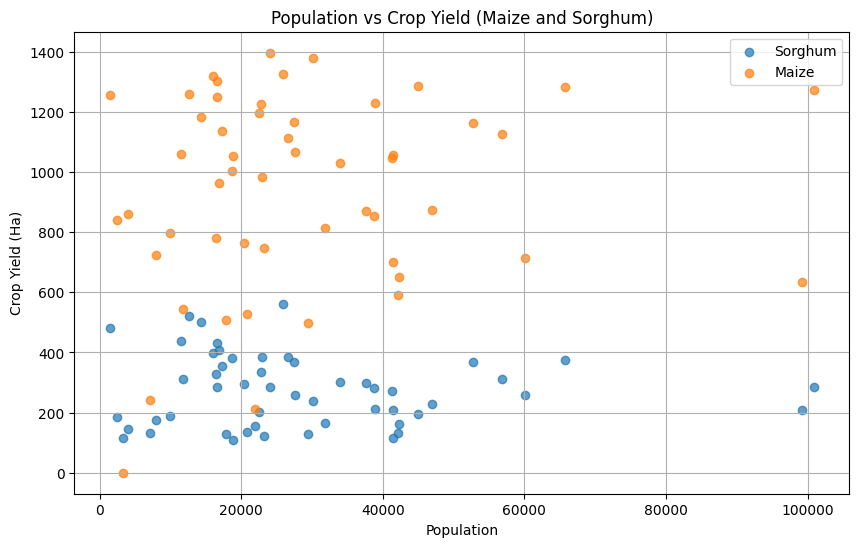

In [29]:
# In District_Crop_Yield and Subcounty_Crop_Yield the field "POP" represents Population in the specified area
# "Crop_Area_Ha" represent area covered by crops
# "S_Area_Ha" represnts area covered by Sorghum and "M_Area_Ha" is area covered by Maize
# "S_Yield_Ha" represents sorghum yeild in hacters and "M_Yield_Ha" represent maize yield in hacters
# We now plot a scatter plot of average crop yield against population from data in each Subcounty

plt.figure(figsize=(10, 6))

# Scatter plot for Sorghum
plt.scatter(Subcounty_Crop_Yield['POP'], Subcounty_Crop_Yield['S_Yield_Ha'], label='Sorghum', alpha=0.7)

# Scatter plot for Maize
plt.scatter(Subcounty_Crop_Yield['POP'], Subcounty_Crop_Yield['M_Yield_Ha'], label='Maize', alpha=0.7)

plt.xlabel('Population')
plt.ylabel('Crop Yield (Ha)')
plt.title('Population vs Crop Yield (Maize and Sorghum)')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation
Overall, the chart shows a weak negative correlation between population and crop yield for both sorghum and maize. This suggests that as the population increases, the crop yield per hectare tends to decrease. However, there is also a significant amount of scatter in the data, indicating that other factors besides population may also influence crop yield.

## 2.4 Crop Area

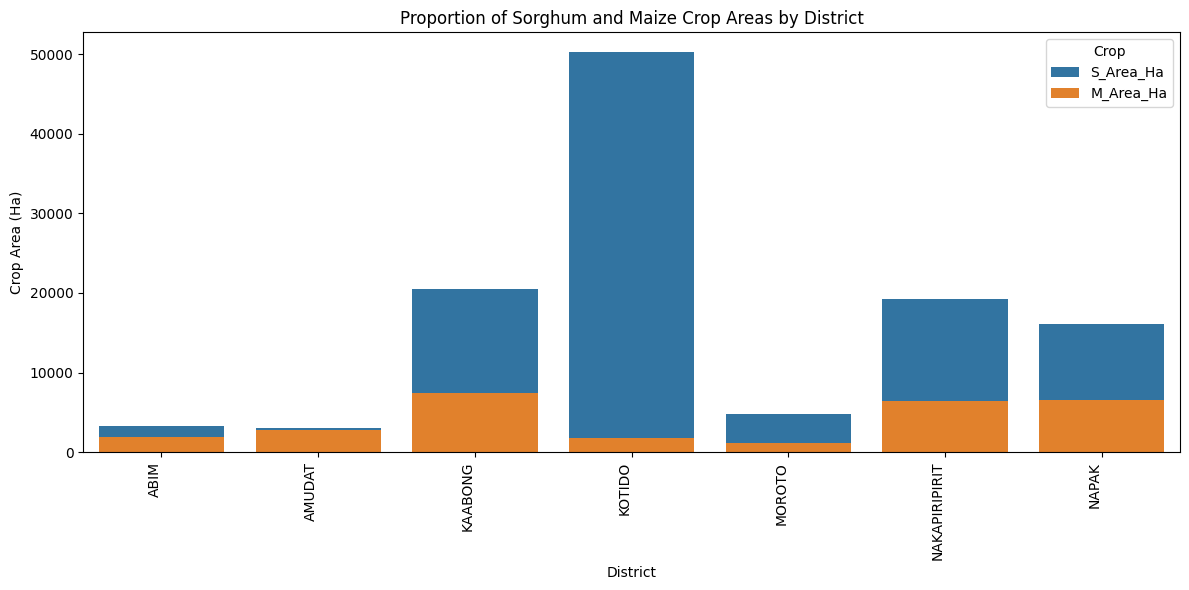

In [35]:
# Stacked Bar chart to show proportion of sorghum and maize crop area within each district
# In District_Crop_Yield the field "Crop_Area_Ha" represent area covered by crops
# "S_Area_Ha" represnts area covered by Sorghum and "M_Area_Ha" is area covered by Maize
# We now plot a stacked bar chart of crop area from data in each Subcounty

# Create a new DataFrame for stacked bar chart
District_Crop_Yield_stacked = District_Crop_Yield.set_index('NAME')[['S_Area_Ha', 'M_Area_Ha']].stack().reset_index()
District_Crop_Yield_stacked.columns = ['NAME', 'Crop', 'Area']

plt.figure(figsize=(12, 6))
sns.barplot(x='NAME', y='Area', hue='Crop', data=District_Crop_Yield_stacked, dodge=False)
plt.xlabel('District')
plt.ylabel('Crop Area (Ha)')
plt.title('Proportion of Sorghum and Maize Crop Areas by District')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Crop')
plt.tight_layout()
plt.show()

### Interpretation
Overall, the chart shows that the district of Kotido has the largest total crop area, with a significantly higher proportion of sorghum compared to maize. The districts of Nakapiripirit and Kaabong also have relatively large crop areas, with a more balanced distribution of sorghum and maize. However, the districts of Abim, Amudat, Moroto, and Napak have relatively small crop areas for both sorghum and maize.

## 2.5 Distributions

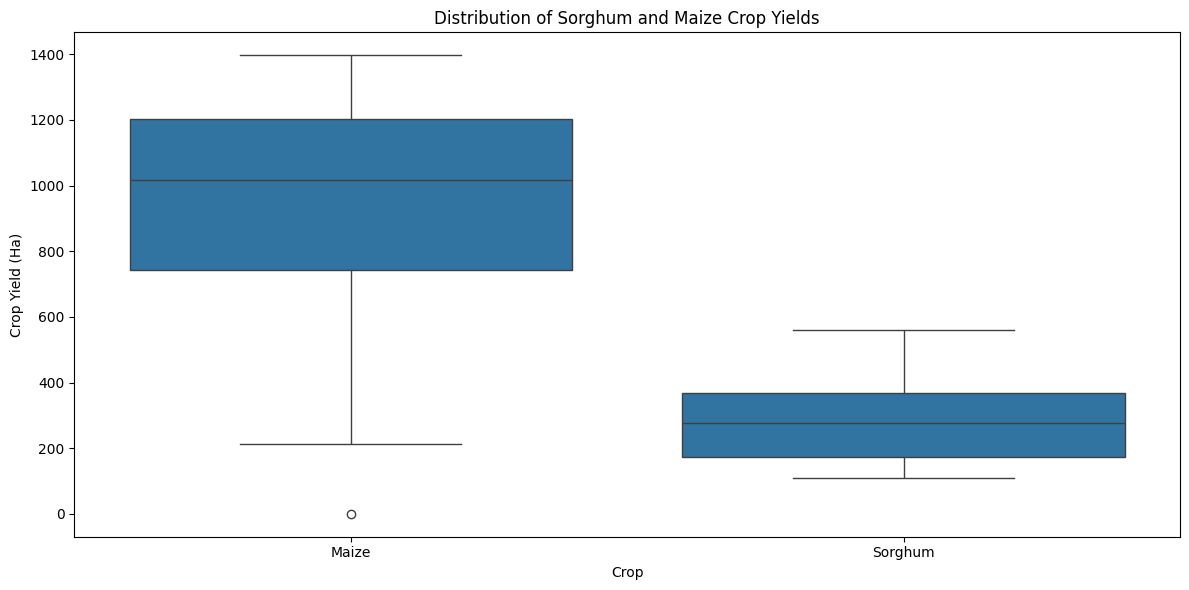

In [39]:
#Creating a boxplot to compare the distribution of crop yields (sorghum and maize) across different sub-counties.
# In Subcounty_Crop_Yield the field "Crop_Area_Ha" represent area covered by crops
# "S_Area_Ha" represnts area covered by Sorghum and "M_Area_Ha" is area covered by Maize
# "S_Yield_Ha" represents sorghum yeild in hacters and "M_Yield_Ha" represent maize yield in hacters
# We now plot a boxplot of crop yield from data in each Subcounty

# Create a new DataFrame for boxplot
Subcounty_Crop_Yield_melted = pd.melt(Subcounty_Crop_Yield, id_vars=['SUBCOUNTY_NAME'],
                                     value_vars=['S_Yield_Ha', 'M_Yield_Ha'],
                                     var_name='Crop', value_name='Yield')

plt.figure(figsize=(12, 6))
# Removed the 'hue' parameter to avoid showing subcounty names to make graph less congested, <for detailed check tableau dashboard>
sns.boxplot(x='Crop', y='Yield', data=Subcounty_Crop_Yield_melted,
            order=['M_Yield_Ha', 'S_Yield_Ha'])
plt.xlabel('Crop')
plt.ylabel('Crop Yield (Ha)')
plt.title('Distribution of Sorghum and Maize Crop Yields')
plt.xticks(ticks=[0, 1], labels=['Maize', 'Sorghum']) # Set x-axis labels
plt.tight_layout()
plt.show()

### Interpretation
Overall, the chart shows that the median crop yield for sorghum is significantly higher than that for maize. The interquartile range (IQR) for sorghum is also slightly larger, indicating a wider spread of yields. However, both crops exhibit a similar range of values, with some outliers present in both distributions.

# 3. Recommendations
Using the data collected, analyzed and vizualized the following recommendations are in order

## 3.1 Recommendations Based on the Findings

**1. Prioritize Investment in High-Yielding Varieties:**
* **Specific Areas:** Focus on sub-counties within the districts of Kotido, Kaabong, and Nakapiripirit, where sorghum production is particularly strong.
* **Recommendations:** Promote the adoption of high-yielding sorghum varieties that are well-suited to the local conditions in these areas.

**2. Improve Agricultural Practices in Low-Yielding Areas:**
* **Specific Areas:** Target sub-counties within the districts of Moroto, Napak, and Abim, which consistently exhibit low crop yields.
* **Recommendations:** Conduct assessments to identify the specific constraints limiting productivity in these areas and implement targeted interventions, such as soil conservation measures, improved irrigation practices, and access to quality inputs.

**3. Promote Diversification of Crop Production:**
* **Specific Areas:** Encourage diversification in all districts, but prioritize areas with limited crop diversity, such as those heavily reliant on sorghum or maize.
* **Recommendations:** Promote the cultivation of complementary crops, such as legumes, root crops, and vegetables, to reduce risk and improve food security.

**4. Strengthen Extension Services:**
* **Specific Areas:** Focus on enhancing extension services in all districts, but prioritize areas with limited access to agricultural information and support.
* **Recommendations:** Invest in training and capacity building for extension workers to ensure they can effectively deliver agricultural advice and services to farmers.

**5. Address Population Growth and Land Pressure:**
* **Specific Areas:** Prioritize addressing these challenges in districts with high population growth and limited land resources, such as Kotido and Nakapiripirit.
* **Recommendations:** Implement family planning programs, promote sustainable land management practices, and explore alternative livelihoods to reduce pressure on agricultural land.


# 4. Conclusion

## Conclusion

**Key Findings:**

* The analysis revealed significant variations in crop yields across different districts and sub-counties in Karamoja.
* Sorghum generally outperforms maize in terms of yield, particularly in the districts of Kotido, Kaabong, and Nakapiripirit.
* Population growth and land pressure are emerging challenges that could impact future crop production.

**Closing Remarks:**

By implementing the recommended strategies, it is possible to enhance agricultural productivity, improve food security, and contribute to the overall development of the Karamoja region. Further research and monitoring will be essential to track progress and inform future interventions.
